# Importing libraries

In [40]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pickle

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style(style="darkgrid")
import plotly.express as px
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline # Import the Pipeline class from scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


# Data Generation

In [41]:
df = pd.read_csv(r"C:\Users\nikhi\Desktop\churnprediction\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [42]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [44]:

from scipy import stats

def detect_outliers_zscore(df, threshold=3):
    z_scores = stats.zscore(df.select_dtypes(include=[float, int]))
    abs_z_scores = abs(z_scores)
    outliers = (abs_z_scores > threshold).sum(axis=0)
    return outliers

outliers = detect_outliers_zscore(df)
missing_total_charges = df['TotalCharges'].isnull().sum()

missing_total_charges, outliers

(0,
 SeniorCitizen     0
 tenure            0
 MonthlyCharges    0
 dtype: int64)

# Explore Data Analysis

1.Understanding the distribution of categorical features helps in identifying any potential imbalances in the data, which may need to be addressed before modeling. It also provides insights into customer behavior and preferences, which are crucial for predicting churn.

Visualizing this distribution enables us to detect any irregularities or patterns that might influence customer churn. For instance, we can observe which categories are more dominant and how they relate to customer churn behavior.

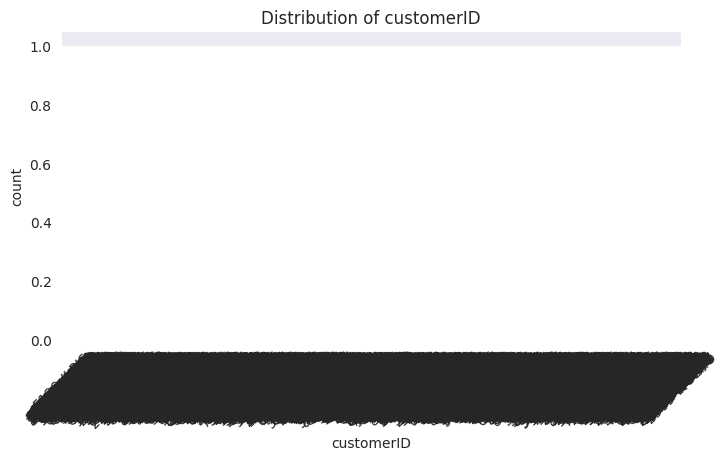

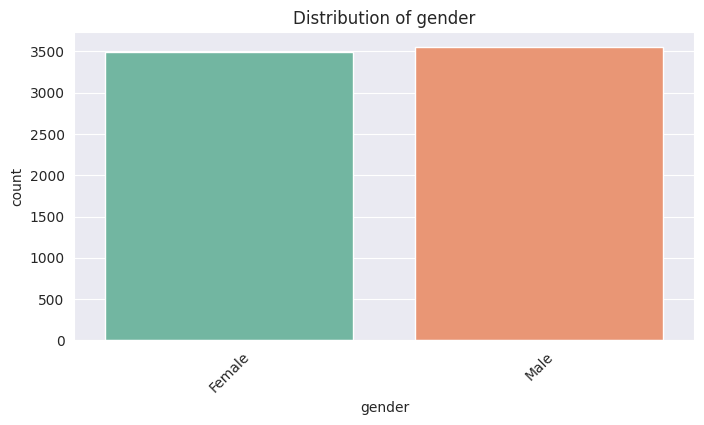

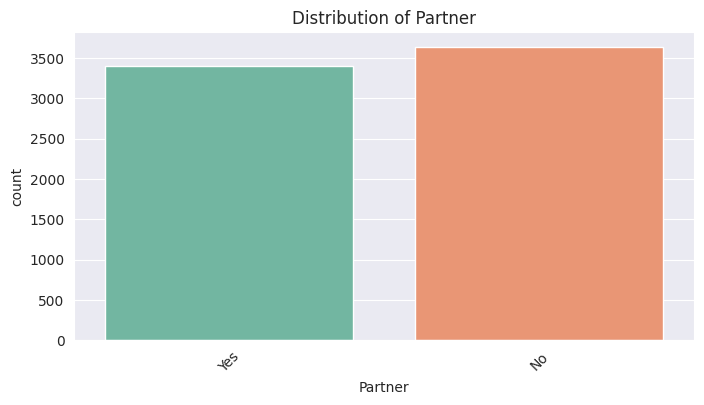

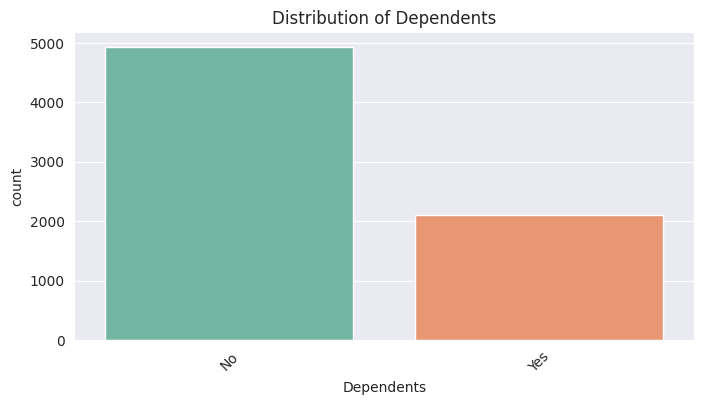

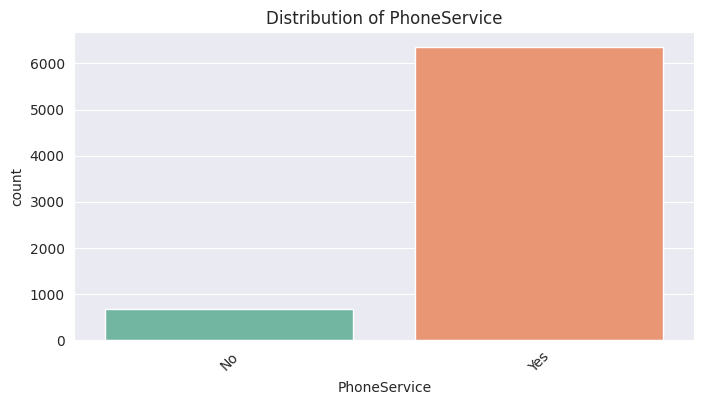

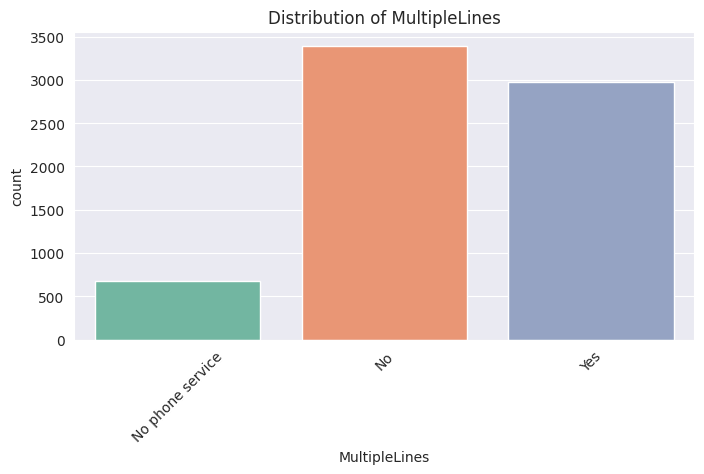

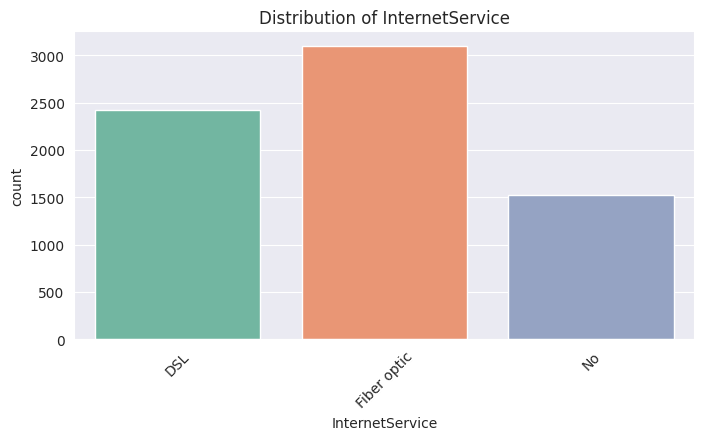

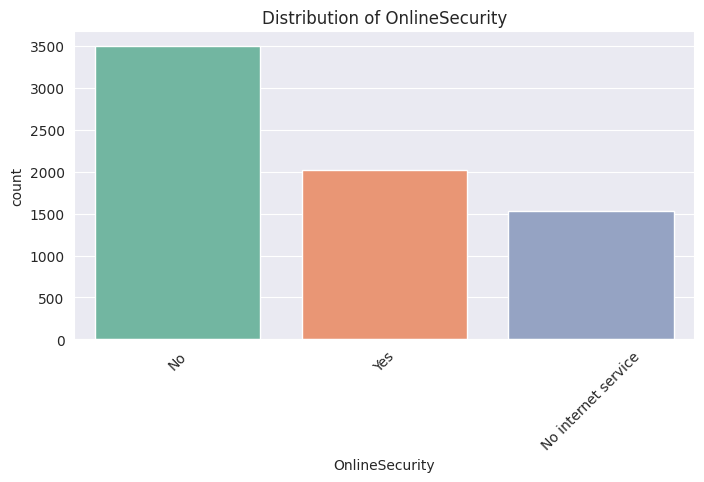

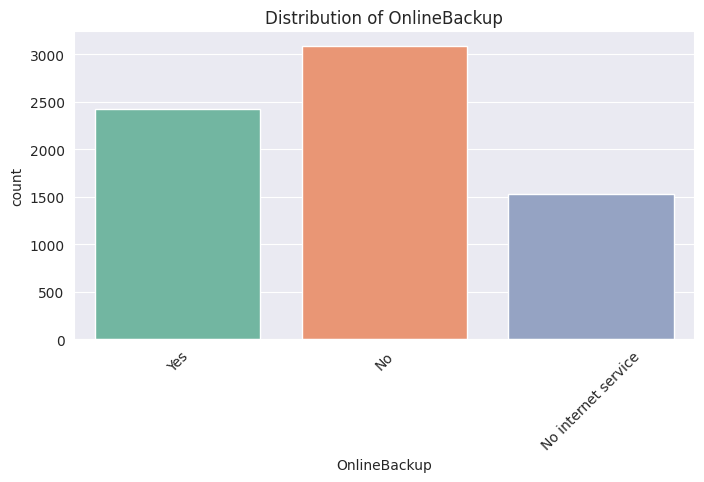

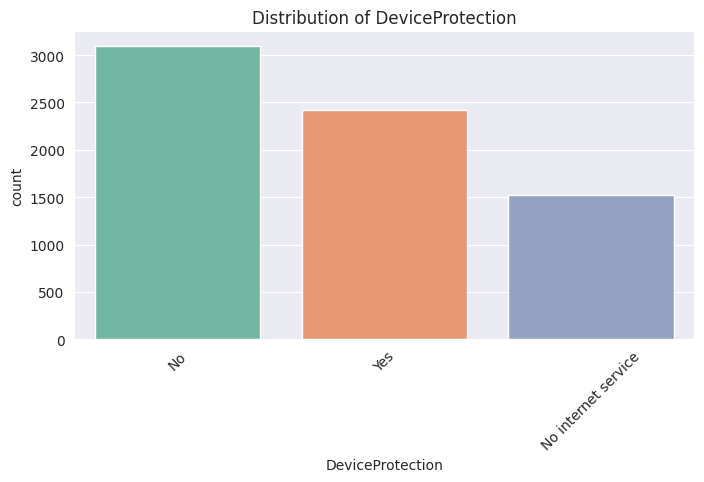

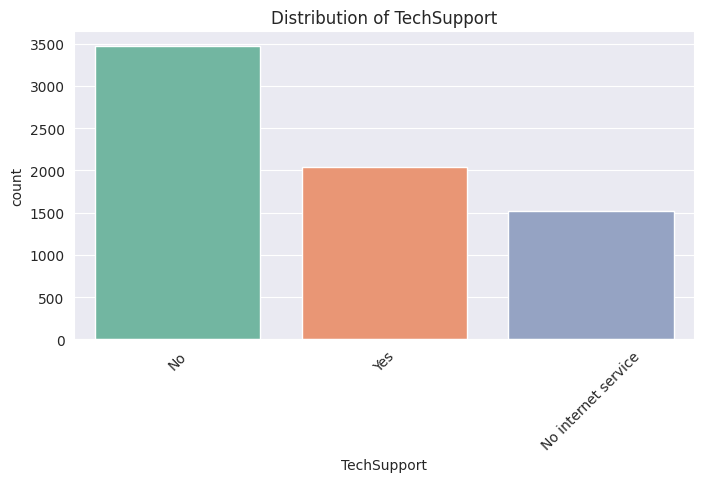

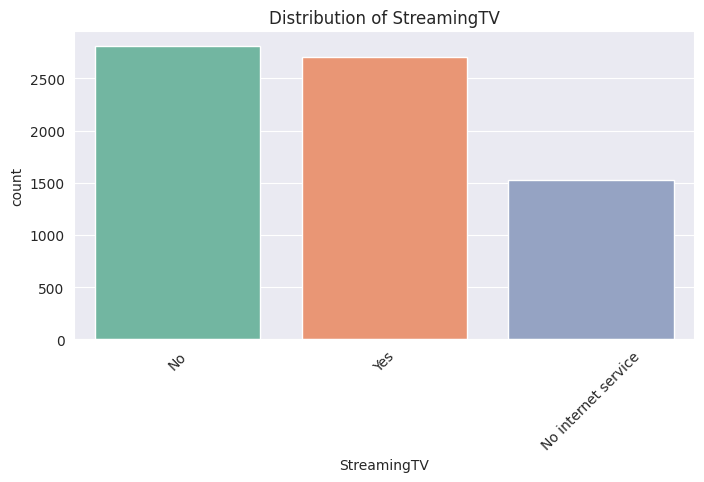

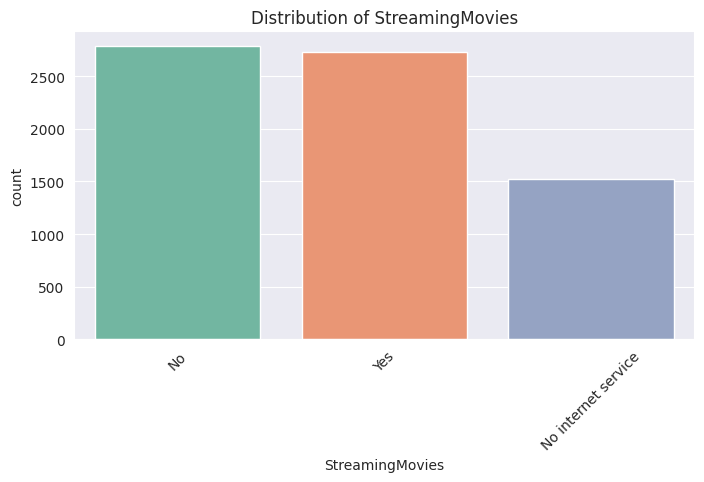

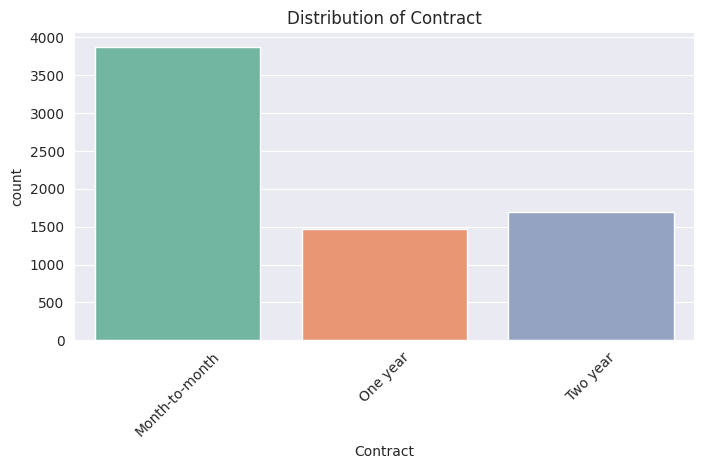

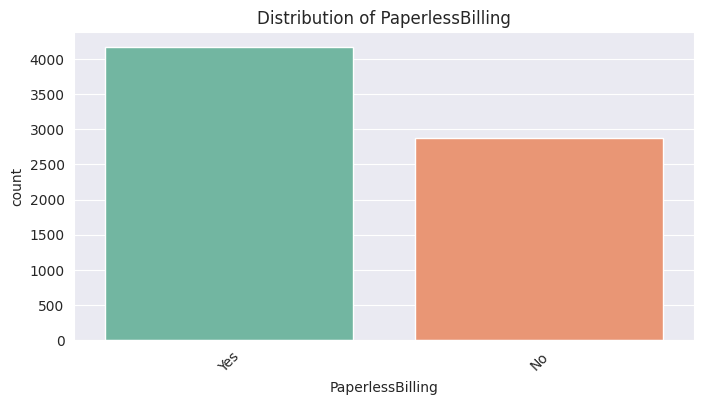

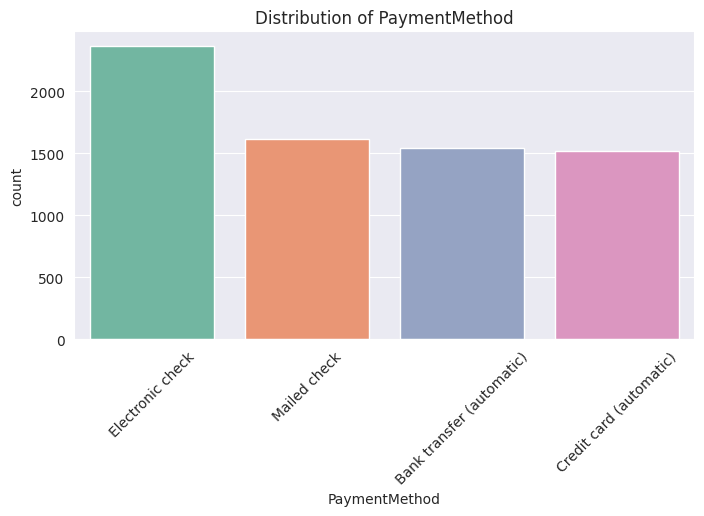

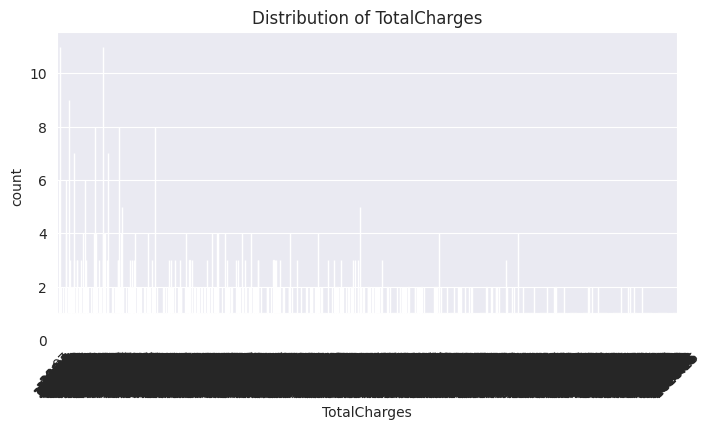

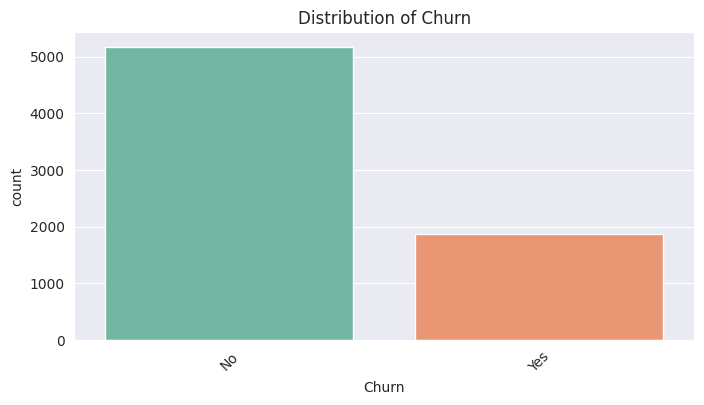

In [63]:
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

2.Understanding the distribution of numerical features is crucial for analyzing patterns in the dataset. In this step, we plot histograms to visualize the distribution of all numerical variables. This helps in identifying outliers, skewness, and any specific patterns in the data.

By visualizing these distributions, we can gain insights into the range of values, the presence of any anomalies, and the overall shape of the data. This step is essential before applying any machine learning models, as it guides feature scaling, transformations, and outlier handling.

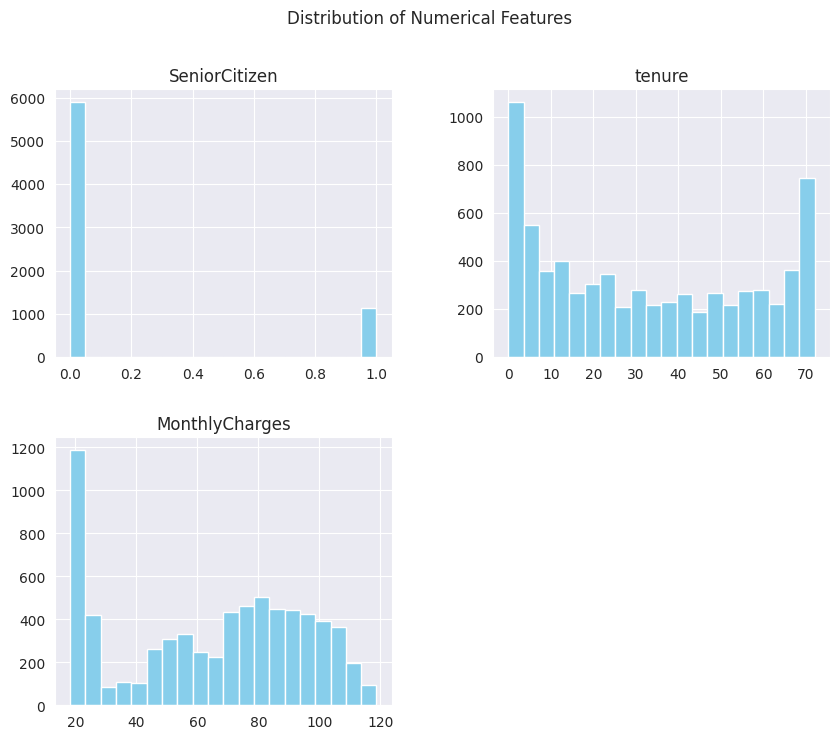

In [64]:

numerical_features = df.select_dtypes(include=[np.number]).columns
df[numerical_features].hist(figsize=(10, 8), bins=20, color='skyblue')
plt.suptitle("Distribution of Numerical Features")
plt.show()

3.In this step, we perform Bivariate Analysis to explore the relationship between the target variable Churn and each of the categorical features in the dataset. By visualizing these relationships, we can gain insights into how each feature impacts customer churn, helping us better understand the dataset and develop effective predictive models.
Purpose of Bivariate Analysis

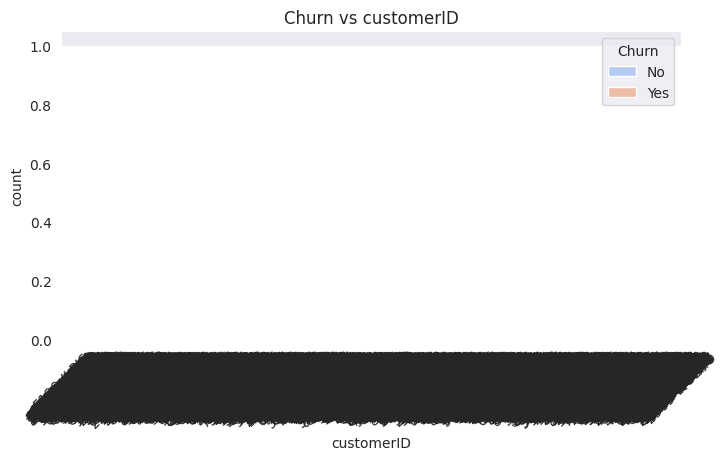

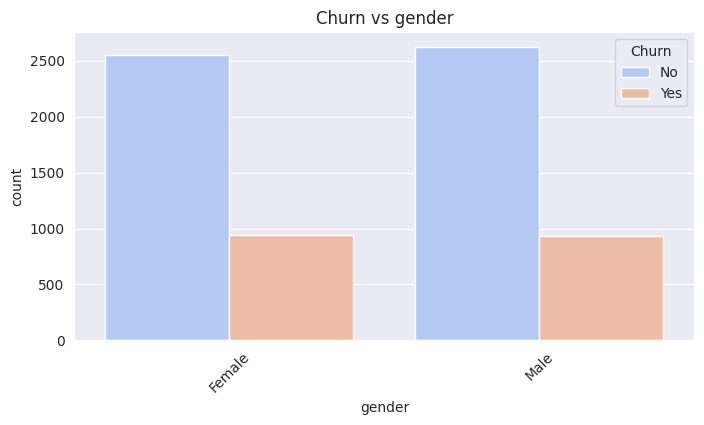

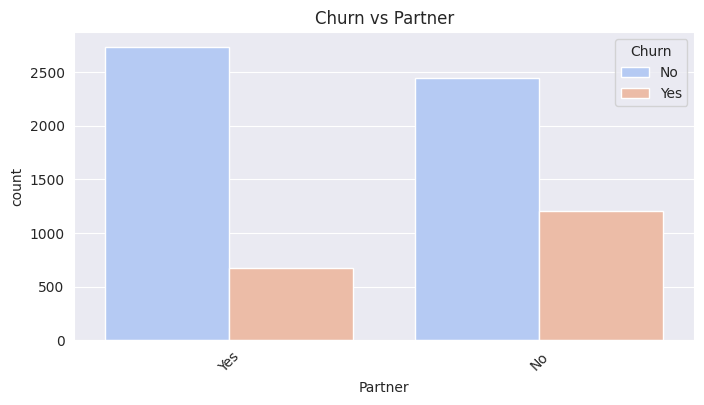

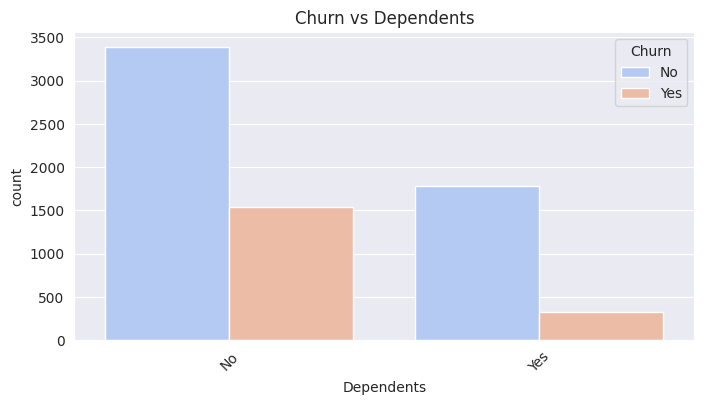

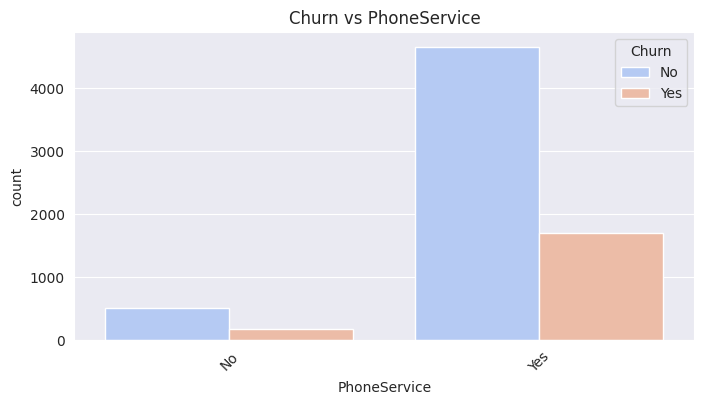

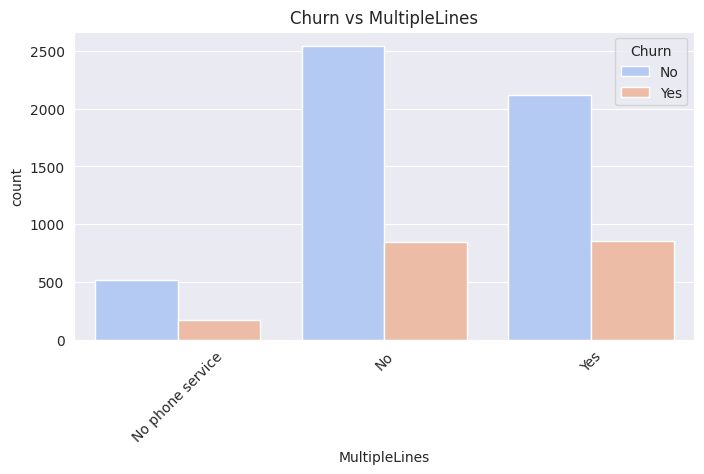

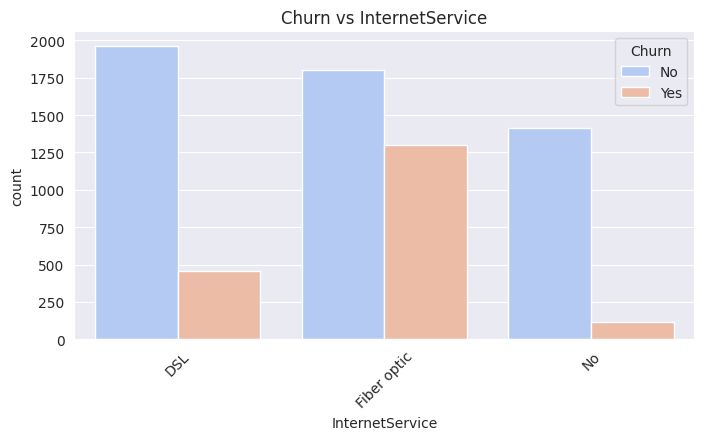

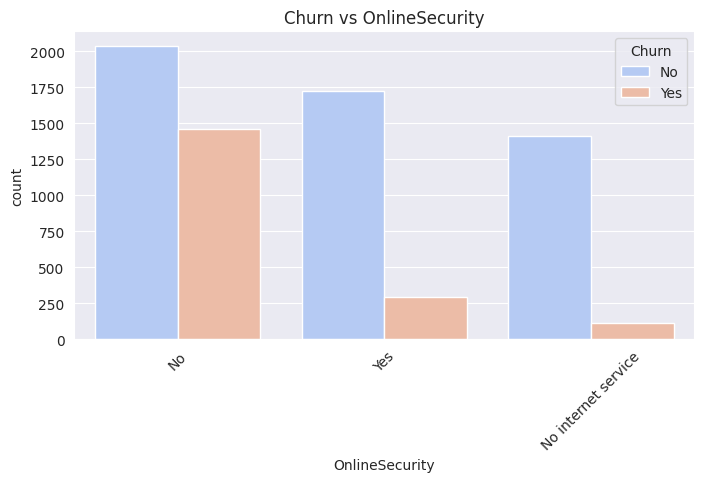

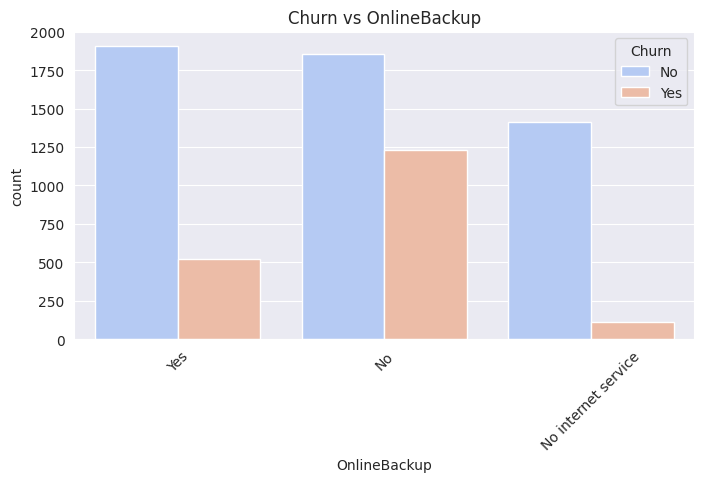

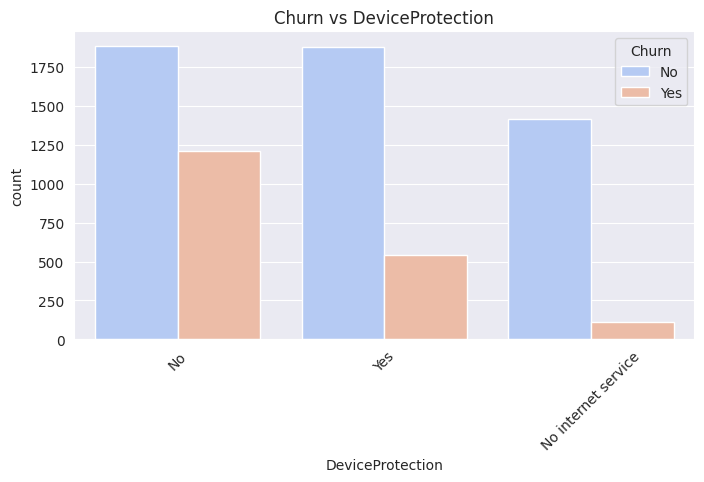

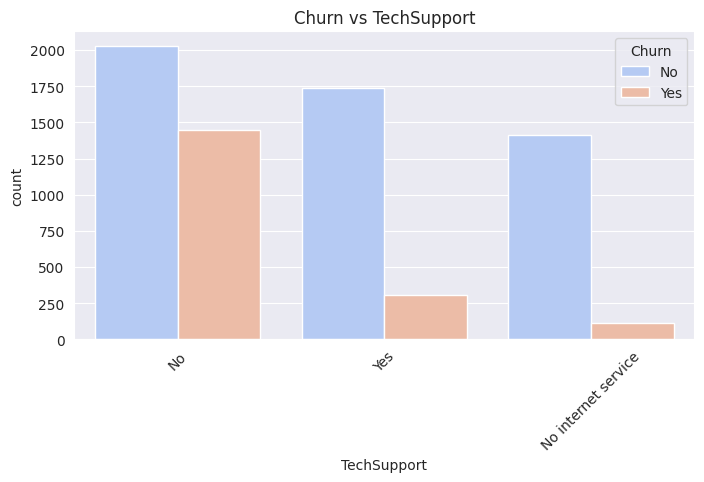

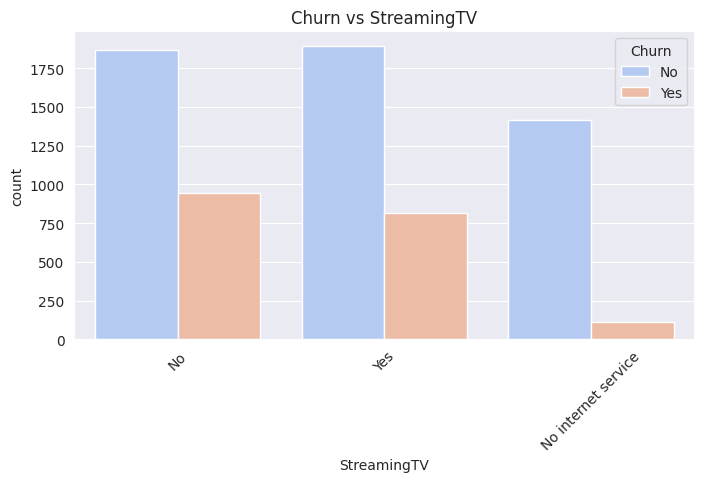

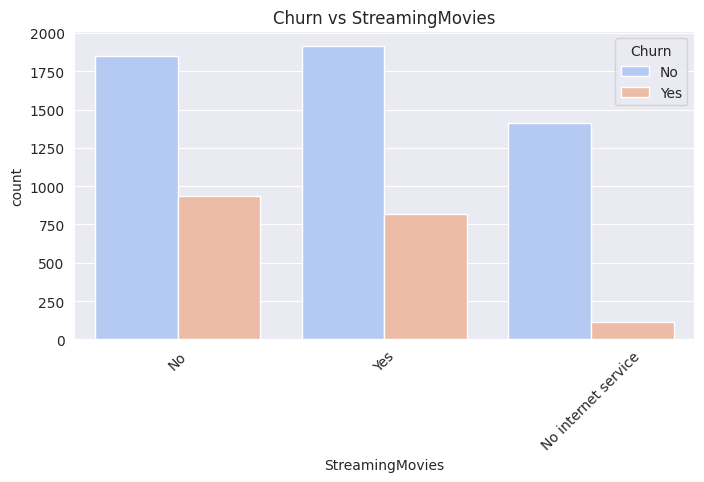

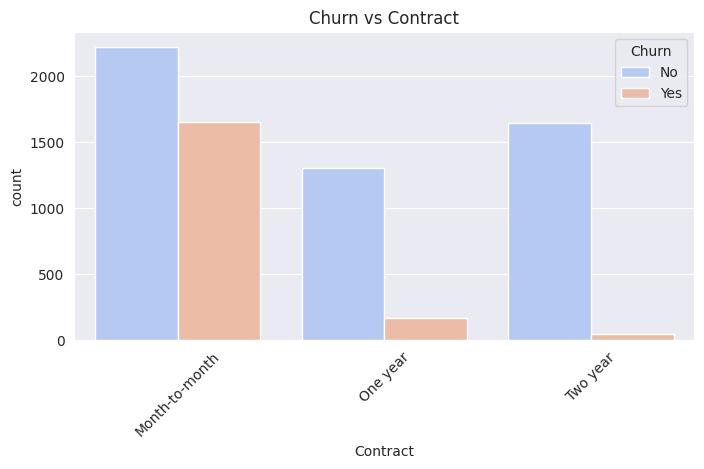

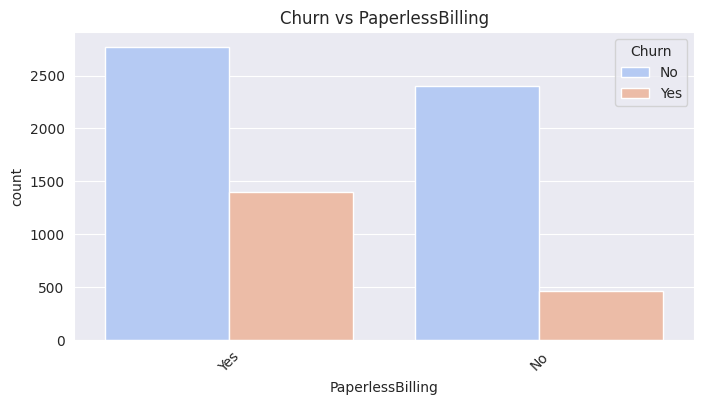

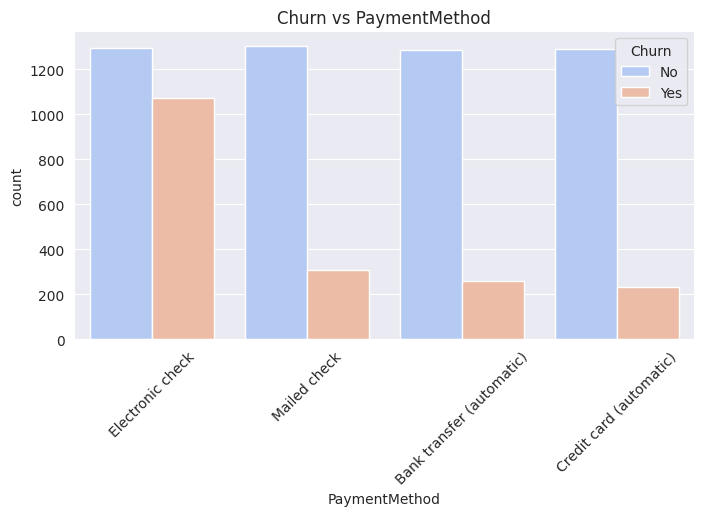

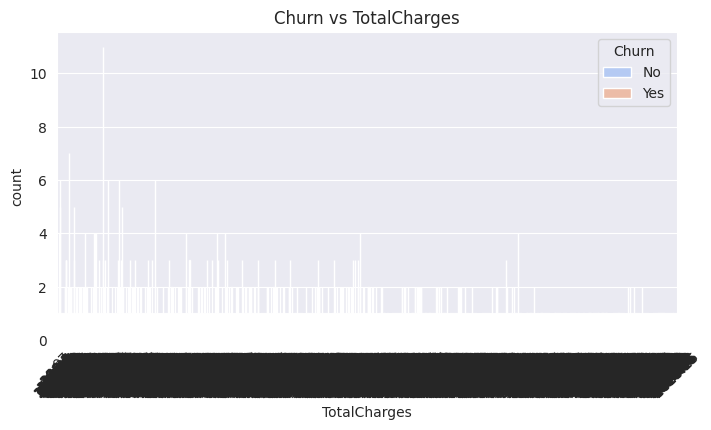

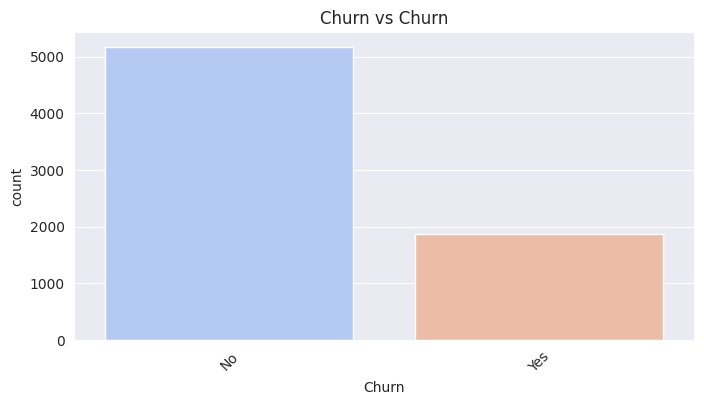

In [65]:
# 4. Bivariate Analysis
# Churn vs Categorical Features
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='Churn', palette='coolwarm')
    plt.title(f'Churn vs {col}')
    plt.xticks(rotation=45)
    plt.show()

4.The following code snippet generates boxplots to visualize the distribution of numerical features with respect to customer churn. Boxplots are useful for understanding the spread and identifying potential outliers in numerical data based on different categories (in this case, churn status).

Each boxplot shows the distribution of a numerical feature for churned and non-churned customers.
These visualizations help in understanding how different numerical features vary between churned and non-churned customers, potentially revealing patterns that can be used for predictive modeling.

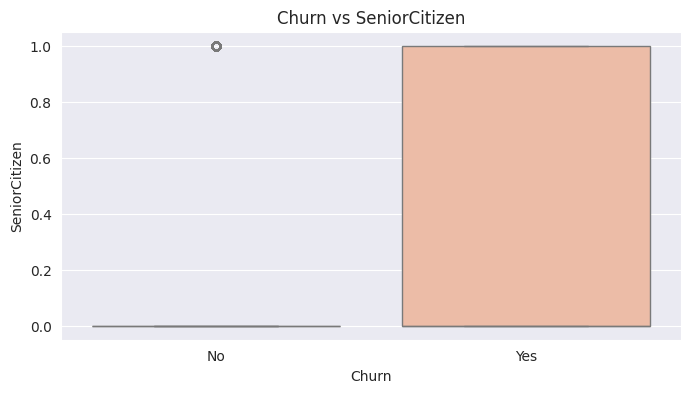

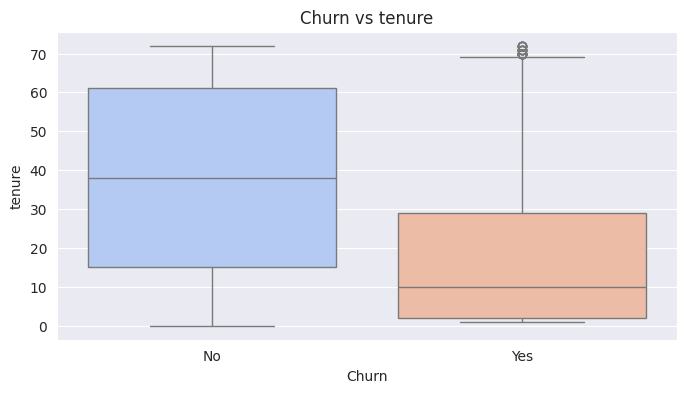

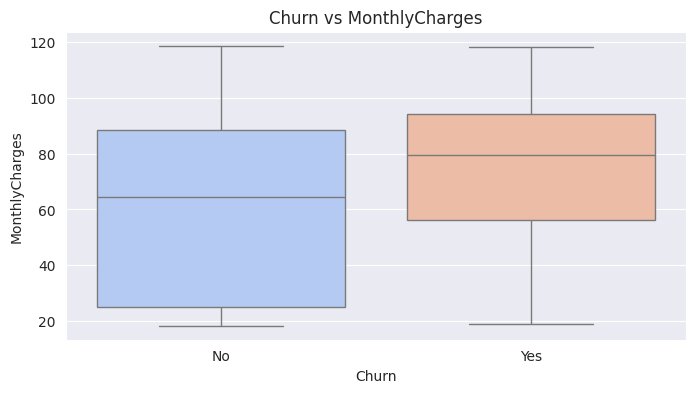

In [66]:

for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='Churn', y=col, palette='coolwarm')
    plt.title(f'Churn vs {col}')
    plt.show()

5.The correlation matrix helps in understanding the relationships between different numerical features in the dataset. It measures how strongly features are related to each other, which can provide insights into multicollinearity and potential feature selection.
This visualization helps to identify which features are highly correlated, enabling us to make informed decisions about feature selection and data preprocessing
The correlation matrix is visualized using a heatmap. In this heatmap:

🟦 Blue indicates a strong negative correlation between features.
🟥 Red indicates a strong positive correlation between features.
🔲 The color gradient represents the strength of the correlation, with darker colors indicating stronger correlations.

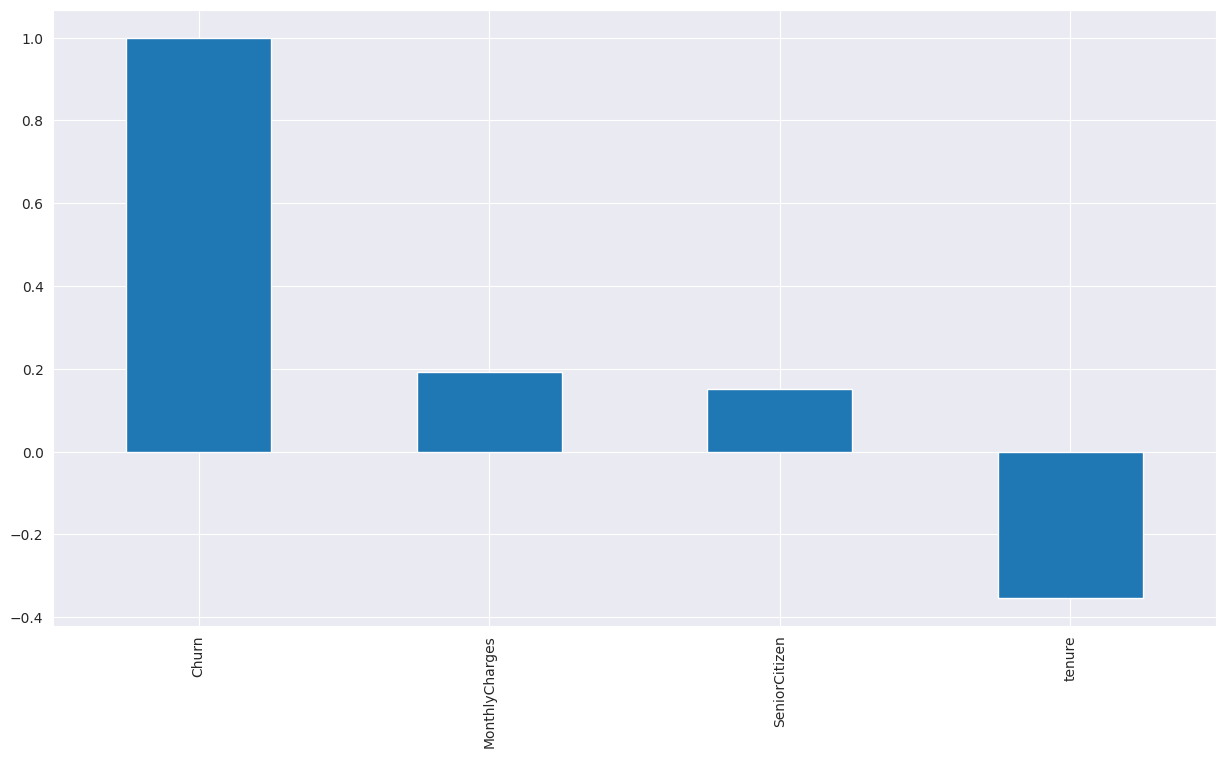

In [67]:
# Convert 'Churn' column to numerical if it's not already
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(15,8))
numerical_df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.show()



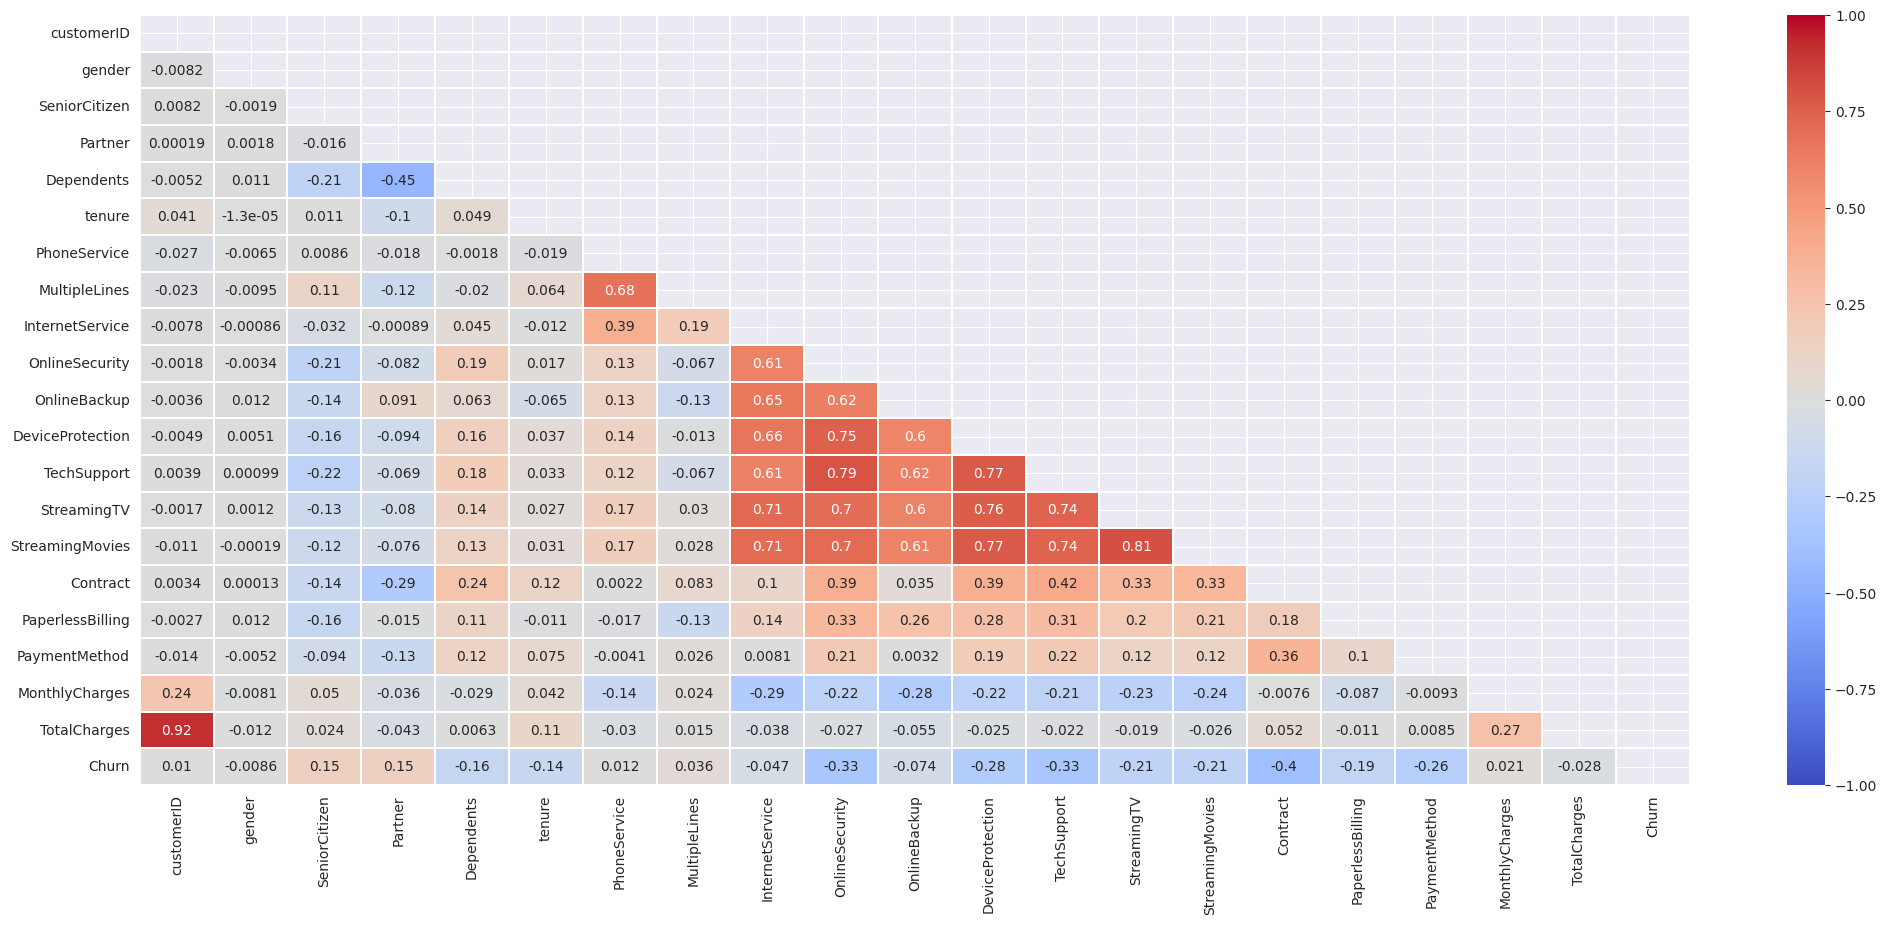

In [68]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [45]:
categorical_vars = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

for vars in categorical_vars:
    print(df[vars].unique())

['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [46]:
numerical_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Data Preprocessing

1.checking No of Null values

In [47]:
#confirming absense of  missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [48]:
#checking for duplicates
df.duplicated().sum()

0

2. Encoding Categorical Variables
Categorical variables are encoded using LabelEncoder to convert them into numeric values. This transformation is necessary because many machine learning algorithms require numeric input. Each category is assigned a unique integer value to facilitate model training.

In [49]:
# convert datatype for 'TotalCharges'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [50]:
def object_to_int(col):
    if col.dtype == 'object' or col.dtype.name == 'category':

        return col.astype('category').cat.codes
    else:

        return col


df = df.apply(lambda x: object_to_int(x))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [51]:
numerical_cols = ['tenure', 'MonthlyCharges','TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


3. Separating Features and Target
The dataset is split into features (X) and target (y). X contains all features except the target variable 'Churn', which is assigned to y. This separation is crucial for training machine learning models

4. Separating Features and Target
The dataset is split into features (X) and target (y). X contains all features except the target variable 'Churn', which is assigned to y. This separation is crucial for training machine learning models.
The dataset is divided into training and testing sets using train_test_split. The training set is used to train the model, while the testing set is used to evaluate its performance. We use a test size of 20% and set a random state for reproducibility.**bold text**

In [52]:
print(df.columns)


columns_to_drop = [ 'customerID','PhoneService']

df.drop(columns=columns_to_drop, axis=1, inplace=True)
df.head()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [53]:
X = df.drop("Churn", axis = 1)
y = df["Churn"]

In [54]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [55]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [82]:
numeric_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
    ('onehot', OneHotEncoder(drop = 'first', sparse = False, handle_unknown= 'ignore'))
])
preprocessor = ColumnTransformer(transformers = [
    ('num', numeric_transformer, numerical_vars),
    ('cat', categorical_transformer, categorical_vars)
])

In [86]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

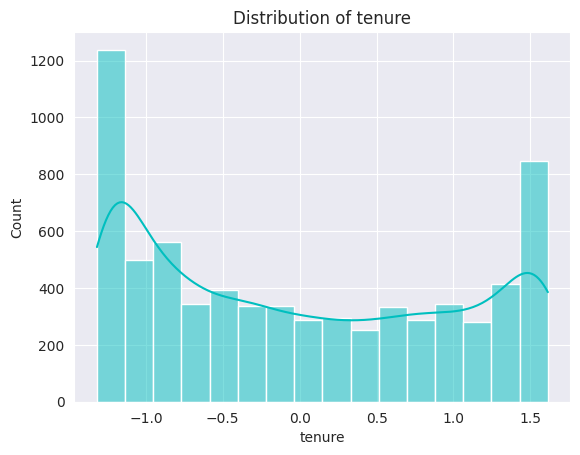

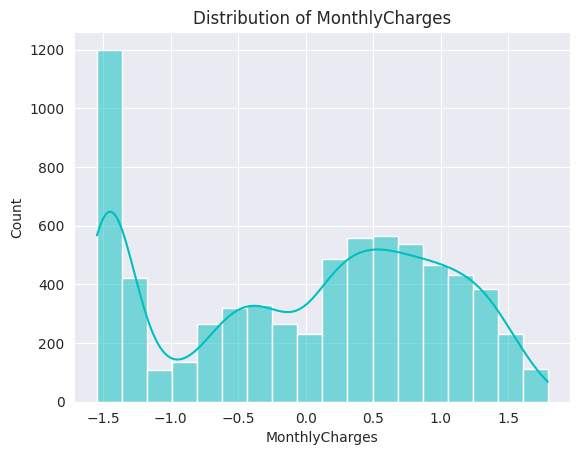

In [100]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[numerical_cols].astype('float64')),
                       columns=numerical_cols)

# Use histplot instead of the deprecated distplot
for feat in numerical_cols:
    sns.histplot(df_std[feat], color='c', kde=True)
    plt.title(f'Distribution of {feat}')
    plt.show()

# Feature Engineering

2.X contains the independent variables (features) that will be used for model training. y contains the dependent variable (the outcome or label that the model is trying to predict).

In [58]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [59]:
X.shape

(7043, 18)

2.This code demonstrates a comprehensive approach to preprocessing both numerical and categorical data for machine learning. The numeric_transformer pipeline handles numerical features by imputing missing values with the median and then scaling them using StandardScaler to ensure that all numerical data have a mean of 0 and unit variance. The categorical_transformer pipeline deals with categorical features by imputing missing values with a constant ('missing') and applying OneHotEncoder to convert categories into binary features while handling unknown categories gracefully. These pipelines are combined using a ColumnTransformer, which applies the appropriate transformations to numerical and categorical columns separately. The preprocessor is then fitted and applied to the training data (X_train), transforming it into a format suitable for model training. Finally, the categorical feature names are extracted post-transformation to ensure proper identification of the processed features. This setup creates a robust pipeline for handling diverse data types in a machine learning model.

In [63]:
def features_engineer(data):

    data['CLV'] = data['tenure'] * data['MonthlyCharges']

    data['AvgMonthlyCharges'] = data['TotalCharges'] / data['tenure']
    data['AvgMonthlyCharges'].fillna(data['MonthlyCharges'], inplace = True)

    return data

In [64]:
X_train = features_engineer(X_train)
X_test = features_engineer(X_test)

3.Adding new features to a dataset, known as feature engineering, involves creating additional variables that can enhance a machine learning model's performance by revealing hidden patterns or providing more context.Adding new features to a dataset, known as feature engineering, involves creating additional variables that can enhance a machine learning model's performance by revealing hidden patterns or providing more context.improving the model's ability to make accurate predictions. Effective feature engineering is crucial for enhancing model performance and generalization.

In [65]:
new_numeric_features = ['CLV','AvgMonthlyCharges']
scaler = StandardScaler()

In [67]:
X_train[new_numeric_features] = scaler.fit_transform(X_train[new_numeric_features])
X_test[new_numeric_features] = scaler.transform(X_test[new_numeric_features])
X_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'CLV', 'AvgMonthlyCharges'],
      dtype='object')

In [68]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,CLV,AvgMonthlyCharges
2661,0,0,0,0,66,1,0,2,2,2,2,0,0,2,1,3,47.40,3177.25,0.361202,-0.553481
4749,1,0,0,0,5,0,0,0,0,0,2,0,0,0,1,2,49.20,216.90,-0.908197,-0.710815
967,1,0,0,1,3,0,2,1,1,1,1,1,1,0,0,3,20.85,60.65,-0.988988,-1.476417
5738,1,0,0,0,1,0,2,1,1,1,1,1,1,0,0,3,20.60,20.60,-1.007462,-1.463747
1807,0,0,0,0,1,0,1,0,0,2,0,0,0,0,0,2,76.35,76.35,-0.982910,0.378920


# Model Evaluation

# Random forest

In [75]:

X_train = X_train.fillna(X_train.mode().iloc[0])
X_test = X_test.fillna(X_test.mode().iloc[0])


X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)


X_train, X_test = X_train.align(X_test, join='inner', axis=1)


model_rf = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1,
                                  random_state=50, max_features="sqrt",
                                  max_leaf_nodes=30)
model_rf.fit(X_train, y_train)


prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.79649787032655


In [76]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1552
           1       0.65      0.50      0.57       561

    accuracy                           0.80      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



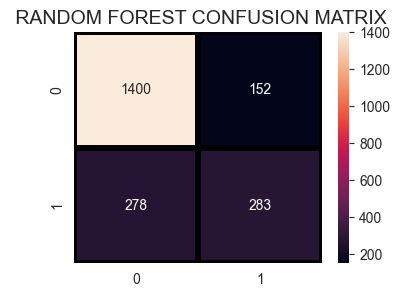

In [77]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

# Logistic Regression

In [113]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7898722195929957


In [114]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1552
           1       0.61      0.57      0.59       561

    accuracy                           0.79      2113
   macro avg       0.73      0.72      0.72      2113
weighted avg       0.79      0.79      0.79      2113



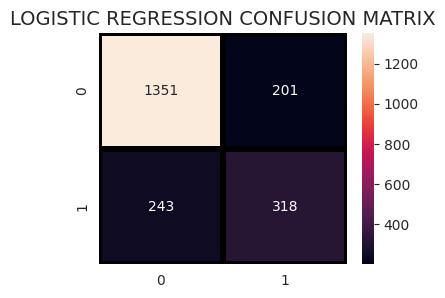

In [115]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

# Decision Tree Classifier

In [117]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7165168007572172


In [118]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1552
           1       0.47      0.52      0.49       561

    accuracy                           0.72      2113
   macro avg       0.64      0.65      0.65      2113
weighted avg       0.73      0.72      0.72      2113



# AdaBoost Classifier

In [119]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.7908187411263606

In [120]:
print(classification_report(y_test, a_preds))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1552
           1       0.62      0.57      0.59       561

    accuracy                           0.79      2113
   macro avg       0.73      0.72      0.72      2113
weighted avg       0.79      0.79      0.79      2113



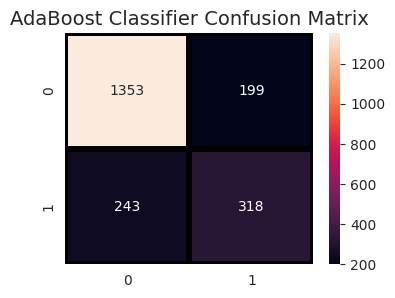

In [121]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()


# Gradient Boosting Classifier

In [122]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.7979176526265973


In [123]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



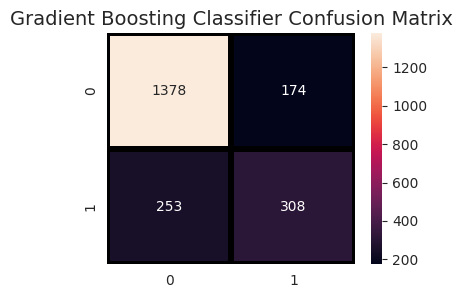

In [124]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=14)
plt.show()

# Model Evaluation

By comparing all above metric values adaboost is the best fitted model

Saving the a_model using pickle

In [125]:
# Save the model
filename = 'savedmodel.sav'
pickle.dump(a_model, open(filename, 'wb'))

In [126]:
# Load the model
loaded_model = pickle.load(open('savedmodel.sav', 'rb'))